# Isotope Systematics of Mixing


In [3]:
# import relevant modules

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import log10, floor
from scipy.optimize import curve_fit

In [4]:
# create our own functions
# function to round a value to a certain number of significant figures
def round_to_n_sf(value, no_of_significant_figures):
    value_rounded = round(value, no_of_significant_figures-1-int(floor(log10(abs(value)))))
    if value_rounded == int(value_rounded): 
        value_rounded = int(value_rounded)
    return value_rounded
            


## Mixing

Mixing plays an important role in numerous geological processes. Examples are:

   * Mixing of water masses in streams, lakes, estuaries or the oceans
   * Contamination or mixing of magmas
   * Formation of average solar system material as a mixture of various distinct components from different stars

Isotopic data are well suited for the identification and the study of mixing processes as they can be used to 

   * Identify the composition and potentially the origin of the mixing end-members
   * Constrain the mass balance of a mixing process 

Therefore, it is worthwhile that we spend some time to look at the systematics of mixing, in particular with regard to isotopes.

To understand mixing relationships, we first need to consider the mathematical foundations. For a mixture $M$ of two components $A$ and $B$, we can define a mixing parameter $f$: 

$$f = \frac{A}{A+B}$$

where $A$ and $B$ are the masses of the components in a given mixture. The concentration of an element $X$ in such a mixture is given by:

$$X_M = X_A f + X_B (1-f)$$

where $X_A$ and $X_B$ are the concentrations of the element in the components $A$ and $B$.

Element $X$ is multi-isotopic and we are interested in the isotope ratio $R$.

If the two end-member components have the isotope ratios $R_A$ and $R_B$, then the isotope composition $R_M$ of mixture is given by: 

$$R_M = \frac{R_A X_A f + R_B X_B (1-f)}{X_A f + X_B (1-f)}$$

## Isotope vs. Element Plots

The equation above can be rearranged to a hyperbolic equation in coordinates of $R_M$ and $X_M$:

$$R_M = \frac{a}{X_M}+b$$

where $a$ and $b$ are constants that are determined by the concentrations and isotope compositions of the mixing endmembers $A$ and $B$. Such a hyperbola can be transformed into a straight line by plotting $R_M$ vs. $\frac{1}{X_M}$. Such a linearization is useful: it allows us to evaluate the
“goodness” of fit of the data to a straight line as a test for the validity of the mixing hypothesis. The following plots show an example of mixing, as found for water samples from the Great Lakes. 

Text(0.5, 1.0, 'Linear fitting')

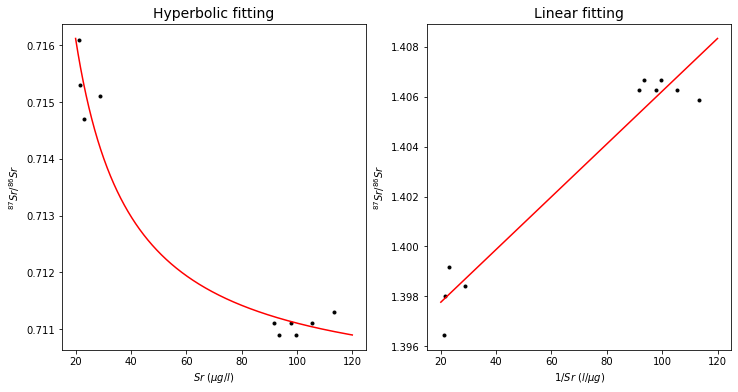

In [5]:
# Plots of Sr-87/Sr-86 ratios vs. Sr concentrations of water samples from the Great Lake in Canada 
# (Faure et al., 1967, Access at https://kb.osu.edu/bitstream/handle/1811/36431/1/OH_WRC_B004OHIO.pdf)

# A general function of isotopic ratio in a mixture vs. elemental concentration (x)
def isotopic_ratio(x, a, b):
    return a/x + b


# Data
Sr_conc = np.array([22.9, 21.6, 21.2, 28.8, 113.4, 91.8, 97.9, 93.5, 99.6, 105.4])
Sr87_Sr86_ratio = np.array([0.7147, 0.7153, 0.7161, 0.7151,
                   0.7113, 0.7111, 0.7111, 0.7109, 0.7109, 0.7111])

# set figures
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# prepare a large number of x for high-resolution fitting
x = np.linspace(20, 120, 1000)
# left figure
# plot data points
ax1.plot(Sr_conc, Sr87_Sr86_ratio, 'k.')
# fit by the isotopic ratio function using scipy
param, _ = curve_fit(isotopic_ratio, Sr_conc, Sr87_Sr86_ratio)
fit = isotopic_ratio(x, param[0], param[1])
ax1.plot(x, fit, 'r')
# label and title the figure
ax1.set_xlabel('$Sr$ ($\mu g/l$)')
ax1.set_ylabel('${^{87}Sr}/{^{86}Sr}$')
ax1.set_title('Hyperbolic fitting', fontsize=14)

# right figure
# plot data points
ax2.plot(Sr_conc, 1/Sr87_Sr86_ratio, 'k.')
# fitting a polynomial degree 1 i.e. a linear curve
poly_coeffs=np.polyfit(Sr_conc, 1/Sr87_Sr86_ratio, 1)
p1 = np.poly1d(poly_coeffs)
ax2.plot(x, p1(x), 'r')
# label and title the figure
ax2.set_xlabel('$1/Sr$ ($l/\mu g$)')
ax2.set_ylabel('${^{87}Sr}/{^{86}Sr}$')
ax2.set_title('Linear fitting', fontsize=14)

## Isotope vs. Isotope Plots

Mixing lines in a plot of one isotope ratio versus another need not be straight – in fact they are generally curved. The degree of curvature is defined by the ratio $K$:

$$K = \frac{M_B/N_B}{M_A/N_A}$$

where $M$ and $N$ denote the denominators of the two isotope ratios and the subscripts denote the two end-members $A$ and $B$.

In the case of isotope ratios, the non-radiogenic denominator isotopes are essentially proportional to the elemental concentration. For a $Nd$ vs. $Sr$ isotope plot, the curvature of a mixing line is thus given by: 

$$K = \frac{Sr_B/Nd_B}{Sr_A/Nd_A}$$

The isotopic mixing line is straight only if $K = 1$. In all other cases, mixing generates curves.

<p style="text-align:center;"><img src="images/M1.png" style="width:550px;height:500px" /></p>

Some additional comments …

   * Mixing lines in $Pb$ isotope plots (${^{207}Pb}/{^{204}Pb}$ vs. ${^{206}Pb}/{^{204}Pb}$, ${^{208}Pb}/{^{204}Pb}$ vs. ${^{206}Pb}/{^{204}Pb}$, etc) are always straight lines because these ratios share a common denominator. 
   * Mixing lines in isochron diagrams (${^{143}Nd}/{^{144}Nd}$ vs ${^{147}Sm}/{^{144}Nd}$, etc) are always straight lines because these ratios share a common denominator. 
   * Mixing lines in element vs. elements diagrams (e.g., $Nd$ vs. $Sr$) are always straight lines because these “ratios” also share a common denominator (of $1$).
   * Mixing lines in element ratio diagrams (e.g., $Cd/Ca$ vs. $Sr/Ca$) need only be straight lines if the element ratios have a common denominator element (as in the example above). 
   

## Problem Set 7 - Question 2

Brahmaputra River water, with a $Sr$ concentration of $0.93\,\mu mol/kg$ and characterized by ${^{87}Sr}/{^{86}Sr} = 0.7210$, mixes with seawater that has $95\,\mu mol/kg$ and ${^{87}Sr}/{^{86}Sr} = 0.7091$. What is the $Sr$ concentration and isotope composition of a $2$+$1$ mixture of seawater and Brahmaputra River water?

<u>Solution</u>:

We will use two following equations to deduce the answers:

$$X_M = X_A f + X_B (1-f)$$

$$R_M = \frac{R_A X_A f + R_B X_B (1-f)}{X_A f + X_B (1-f)}$$

In [7]:
# Question 2

# Brahmaputra River water
X_Sr_Brahmaputra = 0.93  # µmol/kg
R_Sr_Brahmaputra = 0.7210
f = 1/(2+1)
# Seawater
X_Sr_Seawater = 95  # µmol/kg
R_Sr_Seawater = 0.7091
# calculate Sr concentration of the mixture
X_Sr_mix = (X_Sr_Brahmaputra*f) + (X_Sr_Seawater*(1-f))
# calculate Sr isotope composition of the mixture
R_Sr_mix = ((R_Sr_Brahmaputra*X_Sr_Brahmaputra*f) + (R_Sr_Seawater*X_Sr_Seawater*(1-f)))/X_Sr_mix
# print answers
print("The Sr concentration of the mixture is %g µmol/kg." % round_to_n_sf(X_Sr_mix, 2))
print("The Sr isotope composition of the mixture is %.4f." % round_to_n_sf(R_Sr_mix, 4))

The Sr concentration of the mixture is 64 µmol/kg.
The Sr isotope composition of the mixture is 0.7092.


## References

- Faure et al. (1967) *Strontium Isotope Composition and Trace Element Concentrations in Lake Huron and Its Principal Tributaries.* Office of Water Resources Research, The United States Department of Interior. Report number: B-004-OHIO.
- Lecture slide and Practical for Lecture 7 of the High-Temperature Geochemistry module